## C.Joselyn Pérez Pérez 21/02/23

In [1]:
#Parametros físicos
def conduccion_1d(k, S, L, TA, TB, N):
    """"
    Parameters
    ----------
    L:float
    L es la longitud del dominio
    
    k:float
    k es la conductividad del material
    
    S:float
    S es la fuente
    
    TA:float
    TA es la ocndición de frontera del lado izquierdo
    
    TB: float
    TB es la condición de frontera de la derecha
    
    N:int
    N es el número de nodos internos (grados de libertad)
    
    Return
    ------
    Esta función hace lagráfica de la solución
    """
    
    
    import numpy as np
    import matplotlib.pyplot as plt
#    L=5.0
#    k=0.02
#    S=200.0
#    TA=200.0
#    TB=1000.0

    #Parametros numéricos
    N=10
    h=L/(N+1)

    T=np.zeros(N+2)
    b=np.zeros(N)
    A=np.zeros((N,N))

    r=k/h**2
    b[:]=S/r
    T[0]=TA
    T[-1]=TB
    b[0]+= TA
    b[-1]+= TB

    for i in range(1,N-1):
        A[i,i]=2
        A[i,i+1]=-1
        A[i,i-1]=-1

    A[0,0]=2
    A[0,1]=-1
    A[-1,-2]=-1
    A[-1,-1]=2

    T[1:N+1]=np.linalg.solve(A,b)

    plt.plot(T, 'o-') 


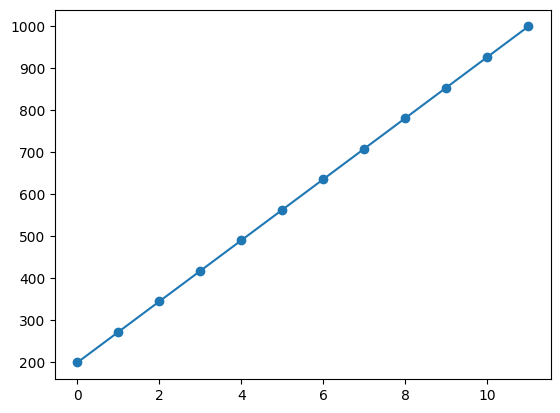

In [2]:
conduccion_1d(0.02, 0, 5, 200, 1000, 5) #Con shift y tabulador sale la descripción

In [3]:
import ipywidgets as widgets

In [4]:
w= widgets.interactive(conduccion_1d,
                       k=widgets.fixed(0.02), 
                       S=widgets.FloatSlider(max=1.0, min=0.0, value=0, step=0.2), 
                       L=widgets.fixed(5.0), 
                       TA=widgets.fixed(200), 
                       TB=widgets.fixed(1000), 
                       N=widgets.IntSlider(max=10, min=4, value=4))

In [5]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=1.0, step=0.2), IntSlider(value=4, descripti…